## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
from keras import optimizers
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

#optimizer = keras.optimizers.Adam(lr=0.001)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.8549 - accuracy: 0.3360 - val_loss: 1.7508 - val_accuracy: 0.3694
Epoch 2/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.6455 - accuracy: 0.4183 - val_loss: 1.6591 - val_accuracy: 0.4057
Epoch 3/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5549 - accuracy: 0.4494 - val_loss: 1.6390 - val_accuracy: 0.4014
Epoch 4/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.4922 - accuracy: 0.4716 - val_loss: 1.5650 - val_accuracy: 0.4347
Epoch 5/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.4377 - accuracy: 0.4896 - val_loss: 1.4588 - val_accuracy: 0.4797
Epoch 6/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3971 - accuracy: 0.5049 - val_loss: 1.5158 - val_accuracy: 0.4650
Epoch 7/500
50000/50000 [==============================] - 2s

50000/50000 [==============================] - 2s 43us/step - loss: 0.3553 - accuracy: 0.8742 - val_loss: 2.4060 - val_accuracy: 0.4958
Epoch 55/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.3590 - accuracy: 0.8727 - val_loss: 2.1926 - val_accuracy: 0.5150
Epoch 56/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.3305 - accuracy: 0.8832 - val_loss: 2.2483 - val_accuracy: 0.5308
Epoch 57/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.3225 - accuracy: 0.8863 - val_loss: 2.1468 - val_accuracy: 0.5305
Epoch 58/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.3078 - accuracy: 0.8925 - val_loss: 2.3240 - val_accuracy: 0.5197
Epoch 59/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.2830 - accuracy: 0.9008 - val_loss: 2.2630 - val_accuracy: 0.5397
Epoch 60/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.2830 - accuracy: 0.9009 - val_loss: 

50000/50000 [==============================] - 2s 42us/step - loss: 0.1347 - accuracy: 0.9527 - val_loss: 3.8813 - val_accuracy: 0.5270
Epoch 110/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.1311 - accuracy: 0.9539 - val_loss: 3.7104 - val_accuracy: 0.5346
Epoch 111/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0956 - accuracy: 0.9664 - val_loss: 3.9265 - val_accuracy: 0.5260
Epoch 112/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.1360 - accuracy: 0.9520 - val_loss: 3.8912 - val_accuracy: 0.5289
Epoch 113/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.1190 - accuracy: 0.9574 - val_loss: 3.9547 - val_accuracy: 0.5316
Epoch 114/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0958 - accuracy: 0.9659 - val_loss: 3.8643 - val_accuracy: 0.5395
Epoch 115/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.0833 - accuracy: 0.9715 - val_

Epoch 164/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 4.7420 - val_accuracy: 0.5510
Epoch 165/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 4.7454 - val_accuracy: 0.5507
Epoch 166/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.8099 - val_accuracy: 0.5563
Epoch 167/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 4.7911 - val_accuracy: 0.5539
Epoch 168/500
50000/50000 [==============================] - 2s 40us/step - loss: 8.5595e-04 - accuracy: 1.0000 - val_loss: 4.8318 - val_accuracy: 0.5546
Epoch 169/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.9003e-04 - accuracy: 1.0000 - val_loss: 4.8703 - val_accuracy: 0.5553
Epoch 170/500
50000/50000 [==============================] - 2s 40us/step - loss: 6.1466e-04

50000/50000 [==============================] - 2s 40us/step - loss: 1.9489e-04 - accuracy: 1.0000 - val_loss: 5.1589 - val_accuracy: 0.5537
Epoch 218/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.9345e-04 - accuracy: 1.0000 - val_loss: 5.1665 - val_accuracy: 0.5533
Epoch 219/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.8954e-04 - accuracy: 1.0000 - val_loss: 5.1657 - val_accuracy: 0.5532
Epoch 220/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.8577e-04 - accuracy: 1.0000 - val_loss: 5.1750 - val_accuracy: 0.5537
Epoch 221/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.8752e-04 - accuracy: 1.0000 - val_loss: 5.1741 - val_accuracy: 0.5542
Epoch 222/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.8366e-04 - accuracy: 1.0000 - val_loss: 5.1825 - val_accuracy: 0.5531
Epoch 223/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.8283e-

50000/50000 [==============================] - 2s 41us/step - loss: 1.2758e-04 - accuracy: 1.0000 - val_loss: 5.2974 - val_accuracy: 0.5555
Epoch 271/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2659e-04 - accuracy: 1.0000 - val_loss: 5.2966 - val_accuracy: 0.5550
Epoch 272/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.2617e-04 - accuracy: 1.0000 - val_loss: 5.2992 - val_accuracy: 0.5549
Epoch 273/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2531e-04 - accuracy: 1.0000 - val_loss: 5.3021 - val_accuracy: 0.5553
Epoch 274/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.2503e-04 - accuracy: 1.0000 - val_loss: 5.3055 - val_accuracy: 0.5541
Epoch 275/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2385e-04 - accuracy: 1.0000 - val_loss: 5.3069 - val_accuracy: 0.5550
Epoch 276/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.2284e-

50000/50000 [==============================] - 2s 41us/step - loss: 9.7136e-05 - accuracy: 1.0000 - val_loss: 5.3885 - val_accuracy: 0.5561
Epoch 324/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.6323e-05 - accuracy: 1.0000 - val_loss: 5.3904 - val_accuracy: 0.5555
Epoch 325/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.6328e-05 - accuracy: 1.0000 - val_loss: 5.3915 - val_accuracy: 0.5560
Epoch 326/500
50000/50000 [==============================] - 2s 40us/step - loss: 9.5860e-05 - accuracy: 1.0000 - val_loss: 5.3922 - val_accuracy: 0.5554
Epoch 327/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.5627e-05 - accuracy: 1.0000 - val_loss: 5.3928 - val_accuracy: 0.5553
Epoch 328/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.4898e-05 - accuracy: 1.0000 - val_loss: 5.3953 - val_accuracy: 0.5551
Epoch 329/500
50000/50000 [==============================] - 2s 41us/step - loss: 9.4582e-

50000/50000 [==============================] - 2s 41us/step - loss: 7.9057e-05 - accuracy: 1.0000 - val_loss: 5.4592 - val_accuracy: 0.5559
Epoch 377/500
50000/50000 [==============================] - 2s 40us/step - loss: 7.8807e-05 - accuracy: 1.0000 - val_loss: 5.4593 - val_accuracy: 0.5554
Epoch 378/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.8454e-05 - accuracy: 1.0000 - val_loss: 5.4604 - val_accuracy: 0.5556
Epoch 379/500
50000/50000 [==============================] - 2s 40us/step - loss: 7.8233e-05 - accuracy: 1.0000 - val_loss: 5.4626 - val_accuracy: 0.5560
Epoch 380/500
50000/50000 [==============================] - 2s 40us/step - loss: 7.8044e-05 - accuracy: 1.0000 - val_loss: 5.4625 - val_accuracy: 0.5556
Epoch 381/500
50000/50000 [==============================] - 2s 40us/step - loss: 7.7707e-05 - accuracy: 1.0000 - val_loss: 5.4643 - val_accuracy: 0.5550
Epoch 382/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.7601e-

50000/50000 [==============================] - 2s 40us/step - loss: 6.7053e-05 - accuracy: 1.0000 - val_loss: 5.5153 - val_accuracy: 0.5551
Epoch 430/500
50000/50000 [==============================] - 2s 42us/step - loss: 6.6841e-05 - accuracy: 1.0000 - val_loss: 5.5169 - val_accuracy: 0.5550
Epoch 431/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.6553e-05 - accuracy: 1.0000 - val_loss: 5.5180 - val_accuracy: 0.5550
Epoch 432/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.6375e-05 - accuracy: 1.0000 - val_loss: 5.5194 - val_accuracy: 0.5551
Epoch 433/500
50000/50000 [==============================] - 2s 40us/step - loss: 6.6241e-05 - accuracy: 1.0000 - val_loss: 5.5202 - val_accuracy: 0.5554
Epoch 434/500
50000/50000 [==============================] - 2s 40us/step - loss: 6.6102e-05 - accuracy: 1.0000 - val_loss: 5.5212 - val_accuracy: 0.5553
Epoch 435/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.5886e-

50000/50000 [==============================] - 2s 41us/step - loss: 5.8347e-05 - accuracy: 1.0000 - val_loss: 5.5661 - val_accuracy: 0.5557
Epoch 483/500
50000/50000 [==============================] - 2s 40us/step - loss: 5.8315e-05 - accuracy: 1.0000 - val_loss: 5.5660 - val_accuracy: 0.5559
Epoch 484/500
50000/50000 [==============================] - 2s 40us/step - loss: 5.8129e-05 - accuracy: 1.0000 - val_loss: 5.5664 - val_accuracy: 0.5558
Epoch 485/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.7960e-05 - accuracy: 1.0000 - val_loss: 5.5682 - val_accuracy: 0.5555
Epoch 486/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.7834e-05 - accuracy: 1.0000 - val_loss: 5.5692 - val_accuracy: 0.5551
Epoch 487/500
50000/50000 [==============================] - 2s 40us/step - loss: 5.7765e-05 - accuracy: 1.0000 - val_loss: 5.5710 - val_accuracy: 0.5557
Epoch 488/500
50000/50000 [==============================] - 2s 40us/step - loss: 5.7569e-

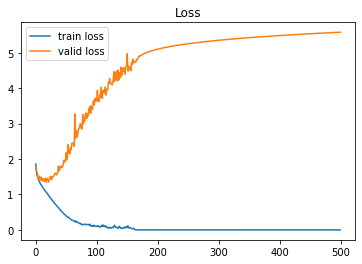

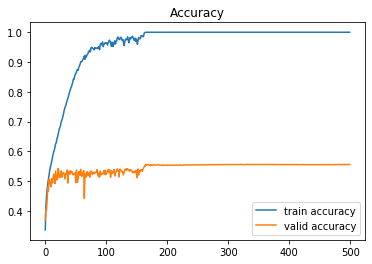

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()